# VISUALIZATIONS

Output of each function are paramters that can be used in Apache ECharts

In [2]:
import pandas as pd
from IPython.display import display, Image

## Waterfall Plot

In [3]:
def waterfall_plot(df: pd.DataFrame, x: str, y: str, title: str):
    vals = df[y].to_list()
    color_labels =[]
    for i in range (1, len(vals)):
        if vals[i] > vals[i-1]:
            color_labels.append('i')
            i_list = [vals[0]]
            d_list = ['-']
        else:
            color_labels.append('d')
            i_list = ['-']
            d_list = [0]
    y = [0]
    c = 0
    for i in range(1, len(vals)):
        if color_labels[c] == 'd':
            y.append(round(vals[i], 2))
            d_list.append(round(vals[i-1] - vals[i], 2))
            i_list.append('-')
        else:
            y.append(vals[i-1])
            i_list.append(round(vals[i] - vals[i-1], 2))
            d_list.append('-')
        c += 1
    return {
        't': title,
        'x': df[x].to_list(),
        'y': y,
        'i': i_list,
        'd': d_list
    }

In [4]:
df = pd.read_csv('data/2/Electric_Production.csv')
df['Year'] = df['DATE'].apply(lambda x: x[-4:])
df.head()

,DATE,IPG2211A2N,Year
0,1/1/1985,72.5052,1985
1,2/1/1985,70.6720,1985
2,3/1/1985,62.4502,1985
3,4/1/1985,57.4714,1985
4,5/1/1985,55.3151,1985


In [5]:
df = pd.DataFrame(df[df['Year'] == '1985'])
df

,DATE,IPG2211A2N,Year
0,1/1/1985,72.5052,1985
1,2/1/1985,70.6720,1985
2,3/1/1985,62.4502,1985
3,4/1/1985,57.4714,1985
4,5/1/1985,55.3151,1985
5,6/1/1985,58.0904,1985
6,7/1/1985,62.6202,1985
7,8/1/1985,63.2485,1985
8,9/1/1985,60.5846,1985
9,10/1/1985,56.3154,1985


In [6]:
waterfall_plot(df, 'DATE', 'IPG2211A2N', 'Electric Production')

{'t': 'Electric Production',
 'x': ['1/1/1985',
  '2/1/1985',
  '3/1/1985',
  '4/1/1985',
  '5/1/1985',
  '6/1/1985',
  '7/1/1985',
  '8/1/1985',
  '9/1/1985',
  '10/1/1985',
  '11/1/1985',
  '12/1/1985'],
 'y': [0,
  70.67,
  62.45,
  57.47,
  55.32,
  55.3151,
  58.0904,
  62.6202,
  60.58,
  56.32,
  56.3154,
  58.0005],
 'i': [72.5052, '-', '-', '-', '-', 2.78, 4.53, 0.63, '-', '-', 1.69, 10.71],
 'd': ['-', 1.83, 8.22, 4.98, 2.16, '-', '-', '-', 2.66, 4.27, '-', '-']}

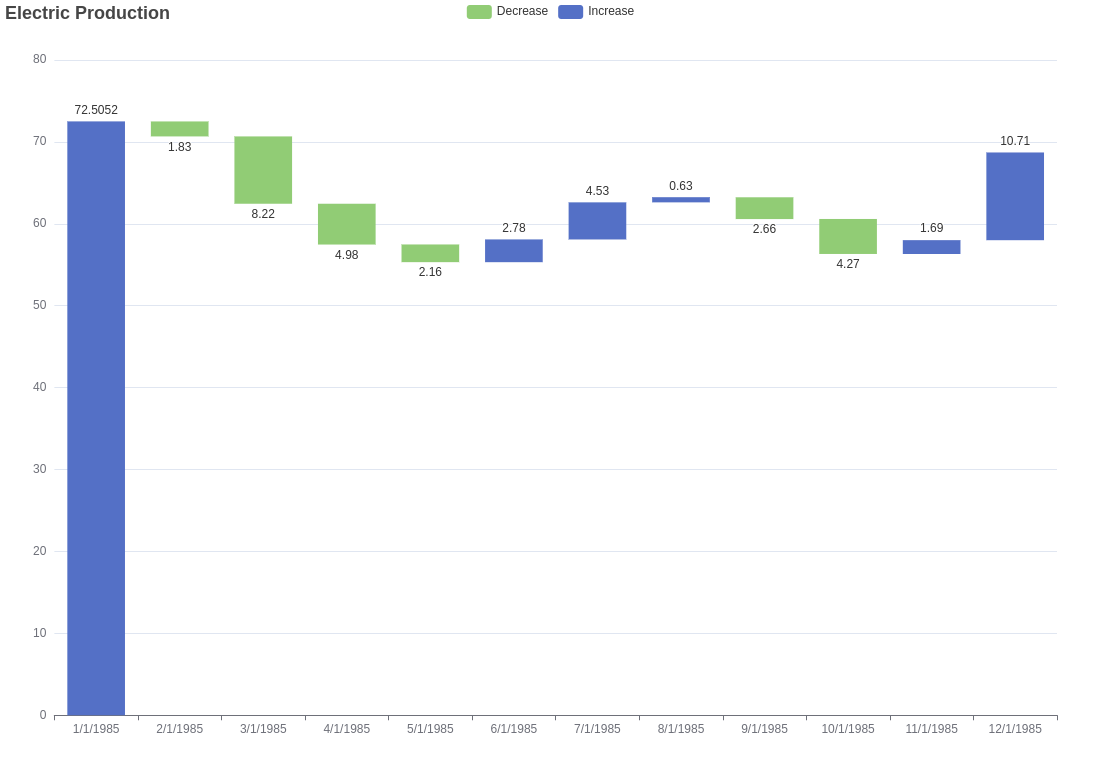

In [7]:
display(Image(filename = 'plots/echarts_pngs/waterfall.png'))

## Stacked Area Plot

In [8]:
def stacked_area_plot(df, columns, x, title):
    return {
        'title': title,
        'names': columns,
        'vals': list(df[columns].values.T),
        'x': df[x].to_list()
    }

In [9]:
df = pd.read_csv('data/3/DailyDelhiClimateTrain.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [10]:
x = stacked_area_plot(df, ['meantemp', 'humidity', 'wind_speed', 'meanpressure'], 'date', 'Delhi weather')

In [11]:
x['x'][:30]

['2013-01-01',
 '2013-01-02',
 '2013-01-03',
 '2013-01-04',
 '2013-01-05',
 '2013-01-06',
 '2013-01-07',
 '2013-01-08',
 '2013-01-09',
 '2013-01-10',
 '2013-01-11',
 '2013-01-12',
 '2013-01-13',
 '2013-01-14',
 '2013-01-15',
 '2013-01-16',
 '2013-01-17',
 '2013-01-18',
 '2013-01-19',
 '2013-01-20',
 '2013-01-21',
 '2013-01-22',
 '2013-01-23',
 '2013-01-24',
 '2013-01-25',
 '2013-01-26',
 '2013-01-27',
 '2013-01-28',
 '2013-01-29',
 '2013-01-30']

In [12]:
[round(i/10, 3) for i in x['vals'][3][:30].tolist()], x['names'][3]

([101.567,
  101.78,
  101.867,
  101.717,
  101.65,
  101.8,
  102.0,
  101.871,
  101.7,
  101.567,
  101.614,
  101.557,
  101.333,
  101.517,
  101.586,
  101.667,
  101.583,
  101.45,
  102.167,
  102.029,
  102.1,
  102.18,
  102.05,
  102.05,
  102.075,
  101.967,
  101.814,
  101.783,
  101.662,
  101.786],
 'meanpressure')

In [13]:
x['names']

['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [14]:
x['title']

'Delhi weather'

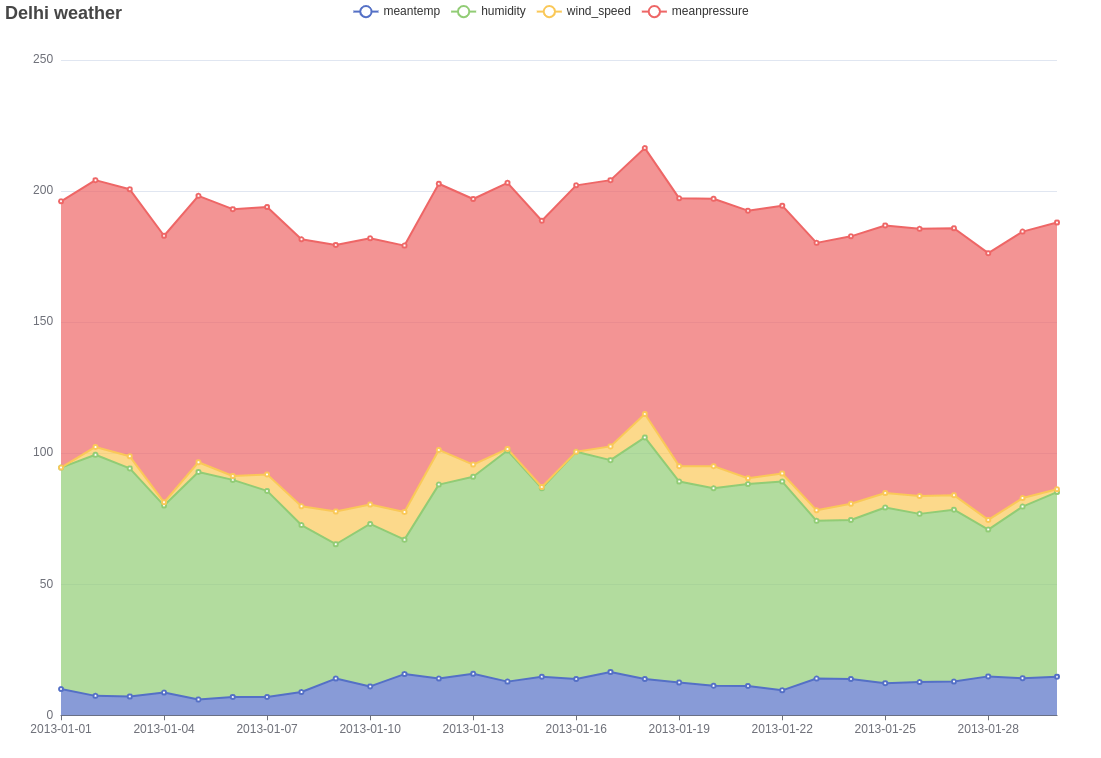

In [15]:
display(Image(filename = 'plots/echarts_pngs/stacked_area.png'))


## Lag Plot

In [16]:
from sklearn.cluster import KMeans



In [17]:
def lag_plot(timeseries, lag, data_reduce = 1):
    x = timeseries.values[:-lag].tolist()
    y = timeseries.values[lag:].tolist()
    data = []
    for i in range(len(x)):
        data.append([x[i], y[i]])
    kmeans = KMeans(int(len(data)/data_reduce))
    kmeans.fit(data)
    data = kmeans.cluster_centers_
    return data.tolist()
    
    

In [18]:
lag_plot(df['meantemp'], 3, 10)

/home/shail/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[31.056442577030815, 31.206842634489693],
 [14.718344155844155, 14.138257575757576],
 [22.47459928415811, 22.895091949823406],
 [37.74821428571428, 36.16642857142857],
 [16.652869352869352, 18.414560439560436],
 [34.31614583333334, 33.87016369047619],
 [28.75609243697479, 30.164285714285715],
 [28.625714285714285, 24.538095238095238],
 [9.937500000000002, 11.359374999999998],
 [20.76934523809524, 20.049107142857142],
 [32.07407211734135, 28.759583063994828],
 [22.65416666666667, 25.214583333333334],
 [30.321428571428573, 36.42],
 [12.600079365079365, 14.796230158730157],
 [27.257440476190474, 27.244734432234434],
 [16.796026437330784, 14.950935029882398],
 [17.011363636363633, 19.656175595238096],
 [24.54896774421231, 24.002625460958793],
 [34.40155677655678, 29.98466117216117],
 [32.14477318977319, 32.98239627142405],
 [13.186805555555555, 12.252232142857142],
 [37.260714285714286, 32.63309671694765],
 [25.3, 31.21875],
 [25.00801282051282, 25.965071428571427],
 [30.526785714285715, 

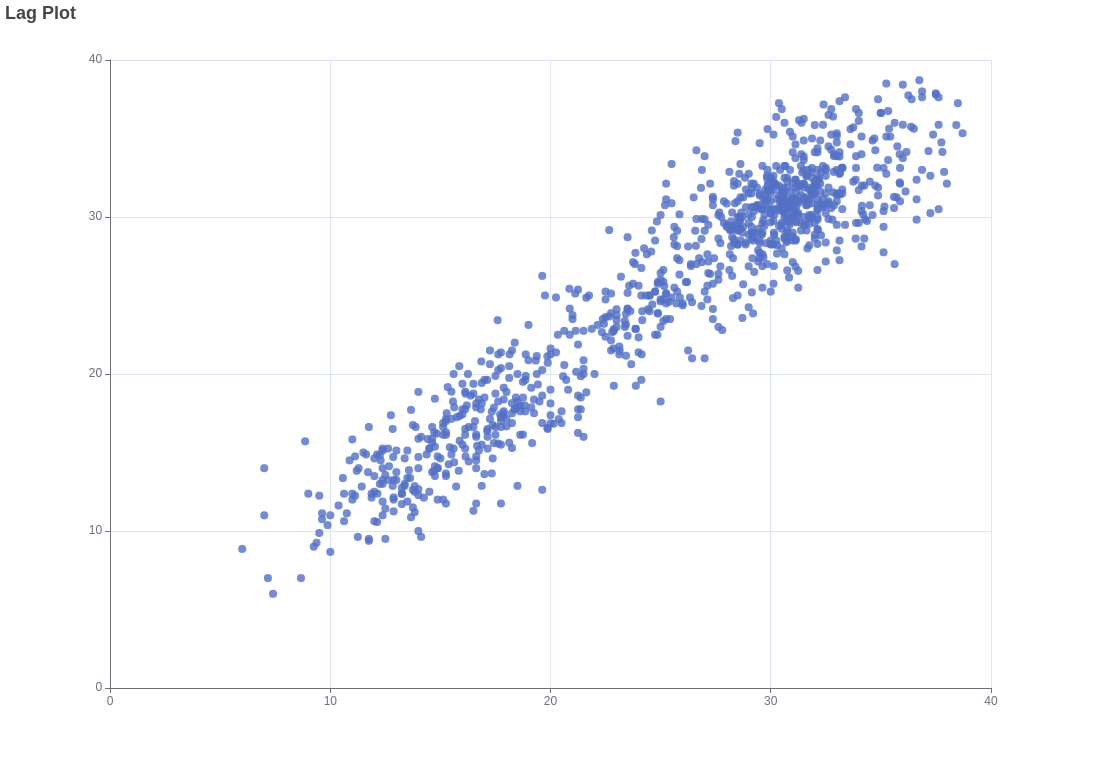

In [19]:
display(Image(filename='plots/echarts_pngs/lagplot.png'))

## Stream Graph

In [20]:
df = pd.read_csv('data/3/DailyDelhiClimateTrain.csv')
df['month'] = df['date'].apply(lambda x: x[5:7])
df['year'] = df['date'].apply(lambda x: x[:4])
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,01,2013
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,01,2013
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,01,2013
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,01,2013
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,01,2013


In [21]:
df1 = pd.DataFrame(df[df['month'] == '01'])
df1 = pd.DataFrame(df1[df1['year'] == '2013'])
df1['meanpressure'] = df1['meanpressure'].apply(lambda x: x/15)
df1

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,67.711111,01,2013
1,2013-01-02,7.400000,92.000000,2.980000,67.853333,01,2013
2,2013-01-03,7.166667,87.000000,4.633333,67.911111,01,2013
3,2013-01-04,8.666667,71.333333,1.233333,67.811111,01,2013
4,2013-01-05,6.000000,86.833333,3.700000,67.766667,01,2013
5,2013-01-06,7.000000,82.800000,1.480000,67.866667,01,2013
6,2013-01-07,7.000000,78.600000,6.300000,68.000000,01,2013
7,2013-01-08,8.857143,63.714286,7.142857,67.914286,01,2013
8,2013-01-09,14.000000,51.250000,12.500000,67.800000,01,2013
9,2013-01-10,11.000000,62.000000,7.400000,67.711111,01,2013


In [22]:
def stream_graph(df, columns, x):
    vals = []
    for i in columns:
        for val_idx in range(len(df[i].values.tolist())):
            vals.append([df[x].values[val_idx], df[i].values[val_idx], i])
    return {
        'data': vals,
        'names': columns
    }

In [23]:
stream_graph(df1, ['meantemp', 'humidity', 'wind_speed', 'meanpressure'], 'date')

{'data': [['2013-01-01', 10.0, 'meantemp'],
  ['2013-01-02', 7.4, 'meantemp'],
  ['2013-01-03', 7.166666666666667, 'meantemp'],
  ['2013-01-04', 8.666666666666666, 'meantemp'],
  ['2013-01-05', 6.0, 'meantemp'],
  ['2013-01-06', 7.0, 'meantemp'],
  ['2013-01-07', 7.0, 'meantemp'],
  ['2013-01-08', 8.857142857142858, 'meantemp'],
  ['2013-01-09', 14.0, 'meantemp'],
  ['2013-01-10', 11.0, 'meantemp'],
  ['2013-01-11', 15.714285714285714, 'meantemp'],
  ['2013-01-12', 14.0, 'meantemp'],
  ['2013-01-13', 15.833333333333334, 'meantemp'],
  ['2013-01-14', 12.833333333333334, 'meantemp'],
  ['2013-01-15', 14.714285714285714, 'meantemp'],
  ['2013-01-16', 13.833333333333334, 'meantemp'],
  ['2013-01-17', 16.5, 'meantemp'],
  ['2013-01-18', 13.833333333333334, 'meantemp'],
  ['2013-01-19', 12.5, 'meantemp'],
  ['2013-01-20', 11.285714285714286, 'meantemp'],
  ['2013-01-21', 11.2, 'meantemp'],
  ['2013-01-22', 9.5, 'meantemp'],
  ['2013-01-23', 14.0, 'meantemp'],
  ['2013-01-24', 13.833333333333

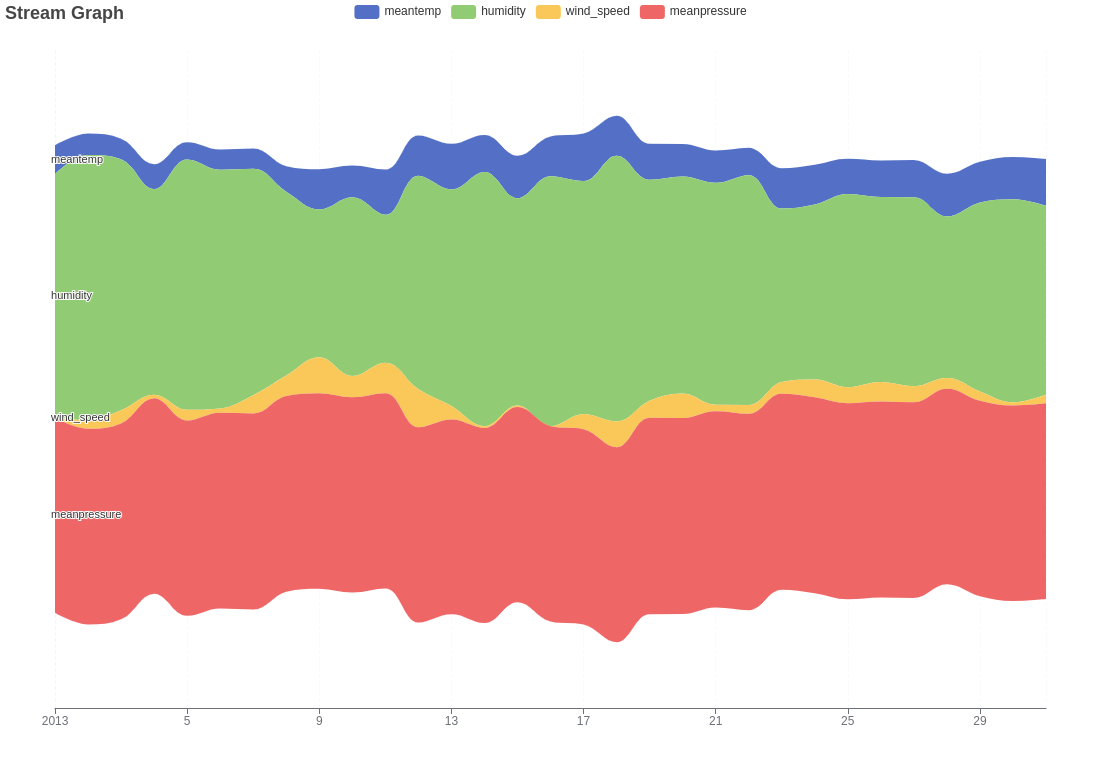

In [25]:
display(Image(filename='plots/echarts_pngs/stream-.png'))